In [ ]:
from math import exp
from random import seed
from random import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_dataset(count, dimension):
    dataset = np.zeros((count, dimension+1), dtype=int)
    for i in range(count):
        data = np.random.randint(0, 2, dimension)
        label = 0 if (np.count_nonzero(data==0) % 2) == 0 else 1
        dataset[i] = np.concatenate((data, np.array([label])))
    return dataset

# dataset = generate_dataset(10, 4)

In [ ]:
# Initialize a network
def initialize_network(n_hidden_layers, n_neurons_in_layers):
	network = list()
	for i in range(n_hidden_layers + 1):
		layer = [{'weights': np.random.rand(n_neurons_in_layers[i] + 1)} for j in range(n_neurons_in_layers[i+1])]
		network.append(layer)
	return np.array(network)

# n_input = dataset.shape[0]
# n_hidden = 4
# n_neurons_in_layers = [10, 2, 3, 3, 2, 1]
# network = initialize_network(n_input, 4, n_neurons_in_layers)

In [ ]:
def plot_graph(data):
    plt.plot(data)
    plt.xlabel("Epochs")
    plt.ylabel("Errors")
    plt.show()

/Library/Python/3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


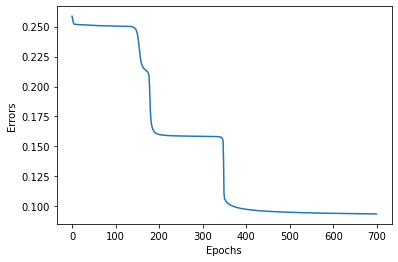

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error/len(network[i + 1]))
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

accuracies = []
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	errors = []
# 	accuracies = []
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [row[-1]]
# 			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		errors.append(sum_error/len(train))
		if epoch%5 == 0:
			accuracies.append(test_accuracy(1000))
	plot_graph(errors)
# 	plot_graph(accuracies)
# 		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

# Test training backprop algorithm
seed(1)
n_input_neurons = 10
n_output_neurons = 1
n_neurons_in_layers = [n_input_neurons, 3, n_output_neurons]
n_hidden_layers = len(n_neurons_in_layers) - 2
n_training_data = 5000

training = generate_dataset(n_training_data, n_input_neurons)
network = initialize_network(n_hidden_layers, n_neurons_in_layers)

learning_rate = 0.3
n_epoch = 700
train_network(network, training, learning_rate, n_epoch, n_output_neurons)

In [ ]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return 1 if (outputs[0] >= 0.5) else 0

def test_accuracy(n_test_data):
	test = generate_dataset(n_test_data, n_input_neurons)
	n_correct = 0
	for row in test:
		prediction = predict(network, row)
		if (prediction == row[-1]):
			n_correct = n_correct + 1      
# 		print('Expected=%d, Got=%d' % (row[-1], prediction))
	accuracy = (n_correct/n_test_data) * 100
	accuracy = round(accuracy, 2)
# 	print('Accuracy=%d' % accuracy)
	return accuracy
    
test_accuracy(1000)

87.6

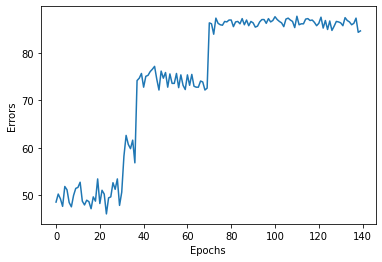

In [ ]:
plot_graph(accuracies)